In [1]:
import math, copy
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
# Same two data points
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

#### For gradient descent to work, update w,b simultaneously until convergence

## Compute Cost Function

In [3]:
def computeCostFunction(x_train, y_train, slope, b):
    """
    Computes the cost function for linear regression.
    
    Args:
      x_train (ndarray (m,)): Data, m examples 
      y_train (ndarray (m,)): target values
      slope, b (scalar)    : model parameters  
    
    Returns
        totalCost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    m = x_train.shape[0]
    summation = 0
    for i in range(m):
        modelFwb = slope * x_train[i] + b
        summation += (modelFwb - y_train[i])**2
    
    return summation / (2*m)


## COMPUTE GRADIENT 
computes the derivative terms for w and b

In [4]:
def compute_gradient(x_train, y_train, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x_train (ndarray (m,)): Data, m examples 
      y_train (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x_train.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    # Compute the gradient as per the formula:
    '''
    dJ/dw = 1/m * summation of i to m (Fwb(x) - y) * x
    dJ/db = 1/m * summation of i to m (Fwb(x) - y) 
    '''
    for i in range(m):  
        f_wb = w * x_train[i] + b 
        dj_dw_i = (f_wb - y_train[i]) * x_train[i] 
        dj_db_i = f_wb - y_train[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 

    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

#### Using ComputeGradient to find and plot some partial derivatives of the cost function relative to one of the parameters w:

The left plot shows derivative of Jwb/Cost Function = the slope of the cost curve relative to w 
at three points. 
On the right side of the plot, the derivative is positive, while on the left it is negative. Due to the 'bowl shape', the derivatives will always lead gradient descent toward the bottom where the gradient is zero.

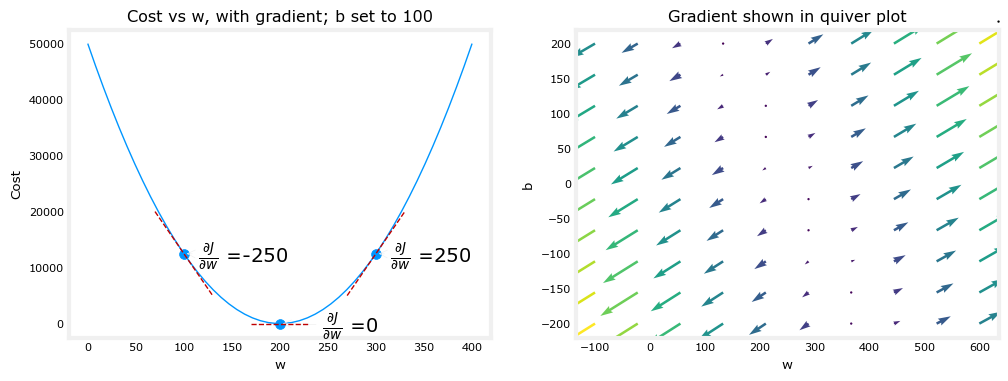

In [5]:
plt_gradients(x_train, y_train, computeCostFunction, compute_gradient)
plt.show()

## Gradient Descent Implementation

Performs gradient descent to fit w,b. Updates w,b by taking 
num_iters gradient steps with learning rate alpha
    
Args:

- x_train (ndarray (m,))  : Data, m examples 
- y_train (ndarray (m,))  : target values
- wInitial, bInitial (scalar): initial values of model parameters  
- alpha (float):     Learning rate
- numIters (int):   number of iterations to run gradient descent
- costFunction:     function to call to produce cost
- gradientFunction: function to call to produce gradient
      
Returns:
- w (scalar): Updated value of parameter after running gradient descent
- b (scalar): Updated value of parameter after running gradient descent
- J_history (List): History of cost values
- p_history (list): History of parameters [w,b] 

In [6]:
def gradient_descent(x_train, y_train, wInitial, bInitial, alpha, numIters, costFunction, gradientFunction):
    w = copy.deepcopy(wInitial) #avoid modifying global wInitial
    # an array to store cost J and w's at each iteration primarily for graphing later
    J_history = [] #cost function points
    p_history = [] #price points
    b = bInitial
    w = wInitial

    for i in range(numIters):
        # Calculate the gradient and update the parameters using gradientFunction
        dj_dw, dj_db = gradientFunction(x_train, y_train, w, b)

        # Update parameters as per equation
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        # Save cost J at each iteration
        if i < 100000: #prevents resource exhaustion
            J_history.append(costFunction(x_train, y_train, w, b))
            p_history.append([w,b])

        # Print cost everytime at intervals 10 times or as many iterations if < 10
        if i% math.ceil(numIters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
        return w, b, J_history, p_history #return w and J,w history for graphing

In the gradient descent process depicted:

- The cost starts large and rapidly declines as described in the slide from the lecture.
- The partial derivatives, dj_dw, and dj_db also get smaller, rapidly at first and then more slowly. As shown in the diagram from the lecture, as the process nears the 'bottom of the bowl' progress is slower due to the smaller value of the derivative at that point.
- progress slows though the learning rate, alpha, remains fixed

In [7]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, computeCostFunction, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
(w,b) found by gradient descent: (  6.5000,  4.0000)


#### Cost Versus Iterations of Gradient Descent

A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs (more runs allows for more opportunities to apply gradient descent to approach minimum). The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

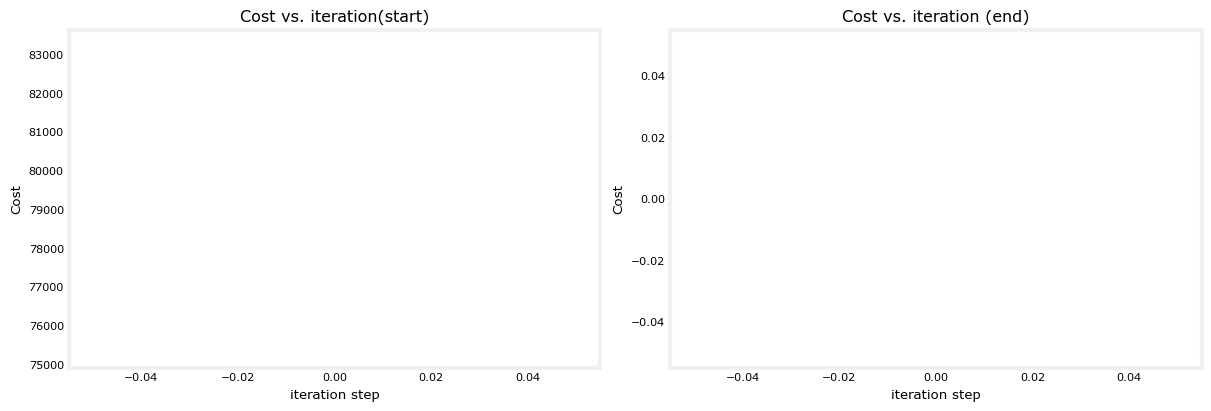

In [8]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

## Predictions
- Now that you have discovered the optimal values for the parameters w and b, you can now use the model to predict housing values based on our learned parameters. 
- As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [9]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 10.5 Thousand dollars
1200 sqft house prediction 11.8 Thousand dollars
2000 sqft house prediction 17.0 Thousand dollars


## Plotting

You can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b).
<br>
The contour plot shows the Cost(w,b) over a range of w and b.
Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent. Here are some things to note:

- The path makes steady (monotonic) progress toward its goal.
- initial steps are much larger than the steps near the goal.
Zooming in, we can see that final steps of gradient descent. Note the distance between steps shrinks as the gradient approaches zero.

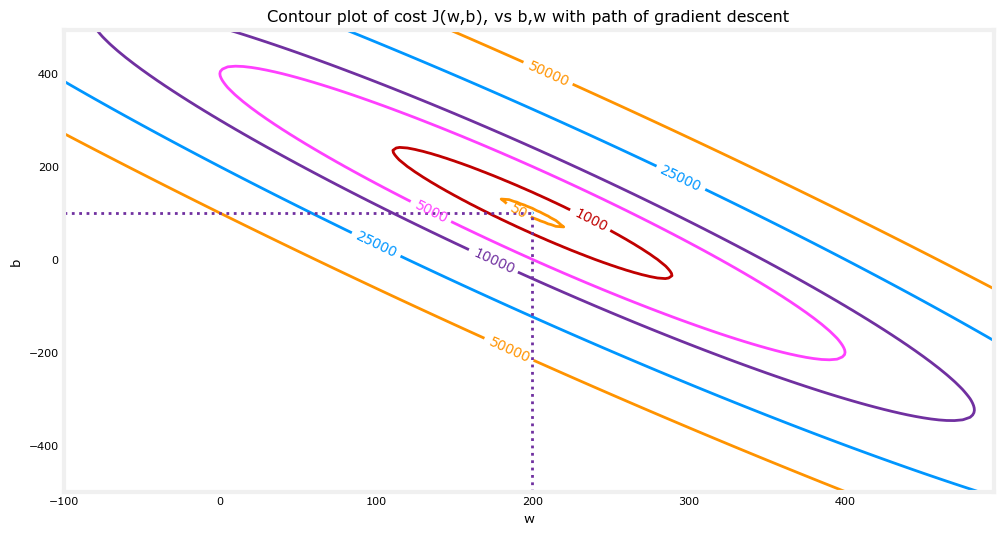

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Zooming in, we can see that final steps of gradient descent. Note the distance between steps shrinks as the gradient approaches zero.

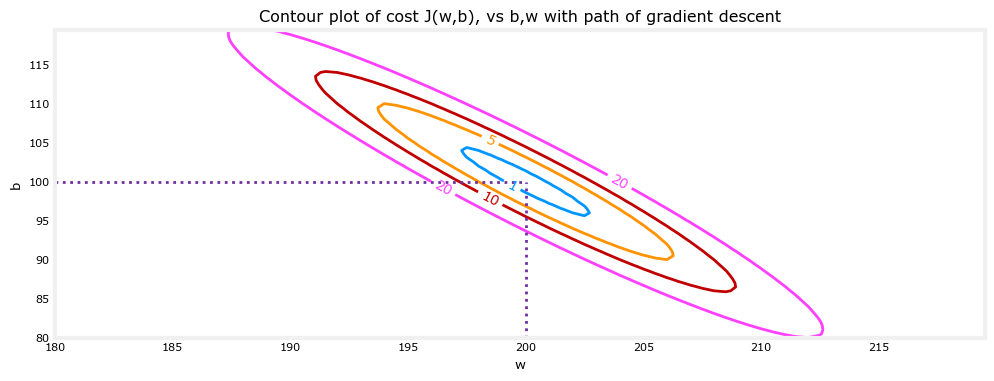

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5], contours=[1,5,10,20],resolution=0.5)

## Increased Learning Rate

What will happen if convergence is not nice due to learning rate being too high?

In [12]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, computeCostFunction, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02


Above, w and b are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. <br>
Furthermore, each iteration changes sign and cost is increasing rather than decreasing. This is a clear sign that the learning rate is too large and the solution is diverging. Let's visualize this with a plot.
<br>
The left graph shows w's progression over the first few steps of gradient descent. w oscillates from positive to negative and cost grows rapidly. Gradient Descent is operating on both w and b simultaneously, so one needs the 3-D plot on the right for the complete picture.

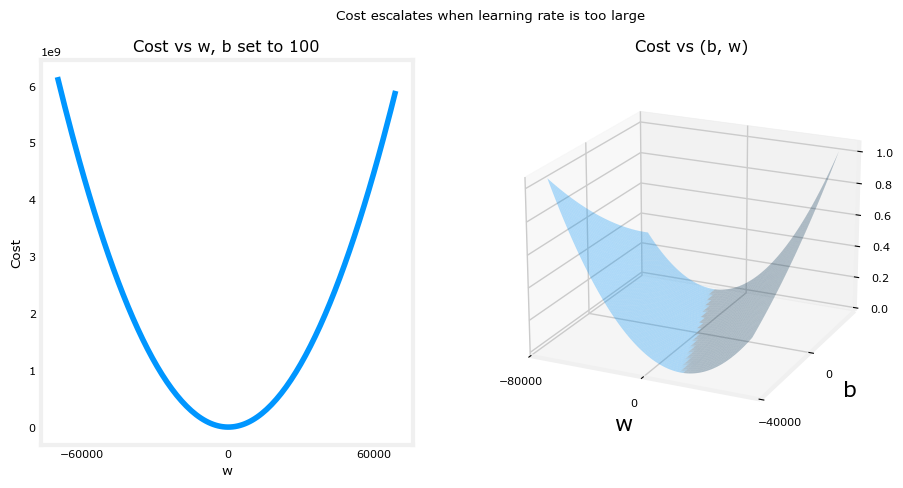

In [13]:
# Visualization of Divergence
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()